# Initial import and useful functions

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#import numpy as np # linear algebra
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current sesson

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style='whitegrid', context='notebook')
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [3]:
# Useful functions


####################
def split_numerical_categorical_cols(df):
    """
    Simple function to get numerical and categorical cols of a dataframe splitted.

    Parameters:
    - df: The dataframe to analyze.

    Return:
    - Numerical_cols: Only the numerical cols of the initial dataframe.
    - Categorical_cols: Only the categorical cols of the initial dataframe.
    """
    numerical_cols = [colname for colname in df.columns if df[colname].dtype in ['int64', 'float64']]
    categorical_cols = [colname for colname in df.columns if df[colname].dtype in ['object']]
    return numerical_cols, categorical_cols


####################
def detect_and_delete_duplicated(df, only_info=False):
    """
    Simple function to show and delete duplicate entries in a DataFrame

    Parameters:
    - df: The DataFrame to erase duplicate entries.
    - only_info: If you only want to know how many duplicates are.

    Return:
    - df: The DataFrame cleaned.
    """
    duplicate_count = df.duplicated().sum()
    print(f"Number of duplicate rows: {duplicate_count}")
    return df.drop_duplicates() if not only_info else None


####################
def get_columns_info(df):
    """
    Function to show initial information about the columns in the dataframe.
    You will get the shape, total nulls and total nulls per column,
    and a summary of numerical and categorical vars separately.

    Parameters:
    - df: The dataframe to analyze.
    """

    # Get numerical and categorical columns, and create two separate dataframes
    numerical_cols, categorical_cols = split_numerical_categorical_cols(df)

    numerical_df = df[numerical_cols]
    numerical_summary = pd.DataFrame({
        'DataType': numerical_df.dtypes,
        'Min': numerical_df.min(),
        'Max': numerical_df.max(),
    })

    categorical_df = df[categorical_cols]
    categorical_summary = pd.DataFrame({
        'DataType': categorical_df.dtypes,
        'Unique': categorical_df.apply(lambda col: list(col.unique()))
    })

    # Print the information and returns
    print("\nNumerical Summary:", numerical_summary)
    print("\nCategorical Summary:", categorical_summary)


####################
def plot_distribution(target, msg='', more_size=False):
    """
    Function to plot the distribution of a feature

    Parameters:
    - target: The feature to analyze.
    - msg: A message to print into the plot.
    - more_size (optional): To create a bigger plot.
    """
    unique, counts_uniques = np.unique(target, return_counts=True)
    print(counts_uniques)

    if more_size: plt.figure(figsize=(12,8))
    else: plt.figure(figsize=(6,4))
    
    plt.bar(unique, counts_uniques)
    plt.title("Distribution")

    plt.xticks(rotation=45, ha='right')
    plt.xlabel(f"{str(msg)}")
    plt.ylabel("Quantity")

    plt.show()

    return counts_uniques

# Understanding the dataset

In [4]:
df_train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
print('Shape train ->', df_train_data.shape)
df_train_data.head()

Shape train -> (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
print('Shape test ->', df_test_data.shape)
df_test_data.head()

Shape test -> (418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
detect_and_delete_duplicated(df_train_data, only_info=True)
df_train_data.isnull().sum()

Number of duplicate rows: 0


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
detect_and_delete_duplicated(df_test_data, only_info=True)
df_test_data.isnull().sum()

Number of duplicate rows: 0


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
get_columns_info(df_train_data)
numerical_cols_train, categorical_cols_train = split_numerical_categorical_cols(df_train_data)


Numerical Summary:             DataType   Min       Max
PassengerId    int64  1.00  891.0000
Survived       int64  0.00    1.0000
Pclass         int64  1.00    3.0000
Age          float64  0.42   80.0000
SibSp          int64  0.00    8.0000
Parch          int64  0.00    6.0000
Fare         float64  0.00  512.3292

Categorical Summary:          DataType                                             Unique
Name       object  [Braund, Mr. Owen Harris, Cumings, Mrs. John B...
Sex        object                                     [male, female]
Ticket     object  [A/5 21171, PC 17599, STON/O2. 3101282, 113803...
Cabin      object  [nan, C85, C123, E46, G6, C103, D56, A6, C23 C...
Embarked   object                                     [S, C, Q, nan]


In [9]:
get_columns_info(df_test_data)
numerical_cols_test, categorical_cols_test = split_numerical_categorical_cols(df_test_data)


Numerical Summary:             DataType     Min        Max
PassengerId    int64  892.00  1309.0000
Pclass         int64    1.00     3.0000
Age          float64    0.17    76.0000
SibSp          int64    0.00     8.0000
Parch          int64    0.00     9.0000
Fare         float64    0.00   512.3292

Categorical Summary:          DataType                                             Unique
Name       object  [Kelly, Mr. James, Wilkes, Mrs. James (Ellen N...
Sex        object                                     [male, female]
Ticket     object  [330911, 363272, 240276, 315154, 3101298, 7538...
Cabin      object  [nan, B45, E31, B57 B59 B63 B66, B36, A21, C78...
Embarked   object                                          [Q, S, C]


In [10]:
#pd.set_option('display.max_rows', None)
df_train_data['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [11]:
for col in categorical_cols_train:
  print('Range count ->', df_train_data[col].value_counts())

Range count -> Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64
Range count -> Sex
male      577
female    314
Name: count, dtype: int64
Range count -> Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64
Range count -> Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7     

## Initial context, observations and information

Initial columns and brief description:

- PassengerID (*int*): ID for each Titanic passenger
- Survived (*int, range -> 0 to 1*): If each passenger survived (1) or not (0)
- Pclass (*int, range -> 1 to 3*): Each passenger ticket class, from first class to third class
- Name (*categorical*): Each passenger name
- Sex (*categorical -> male, female*): Each passenger sex
- Age (*float, range -> 0.17 to 80*): Age of each passenger
- SibSp (*int, range -> 0 to 8*): Number of passenger siblings and spouses aboard the Titanic
- Parch (*int, range -> 0 to 9*): Number of passenger parents and children aboard the Titanic
- Ticket (*categorical*): Number the passenger ticket
- Fare (*float, range -> 0 to 512.3292*): How much each passenger paid for the ticket
- Cabin (*categorical*): Which cabin had assigned each passenger
- Embarked (*categorical -> C, S, Q*): Port of embarkation for each passenger (C is Cherbourg, Q is Queenstown, S is Southampton)

Initial observations:

- There are no duplicated rows
- There are some rows with at least one column with null values (Age, Cabin, Embarked)
- The Embarked feature is highly unbalanced, where almost three quarters of the total embarked in Southampton
- In terms of sex, there were more male than female

# Exploratory Data Analysis 

## Null values

In [12]:
df_train_dc = df_train_data.copy(deep=True)
df_test_dc = df_test_data.copy(deep=True)

# Filling age with the mean value between all ages
df_train_dc['Age'] = df_train_dc['Age'].fillna(value = df_train_dc['Age'].mean())
df_test_dc['Age'] = df_test_dc['Age'].fillna(value = df_test_dc['Age'].mean())

# Filling cabin with N value (there are too much null values and N is choose randomly)
df_train_dc['Cabin'] = df_train_dc['Cabin'].fillna(value = 'N')
df_test_dc['Cabin'] = df_test_dc['Cabin'].fillna(value = 'N')

# Filling embarked with the most repeated value
df_train_dc['Embarked'] = df_train_dc['Embarked'].fillna(value = df_train_dc.Embarked.mode()[0])

#Filling fare with the mean of all fare entries
df_test_dc['Fare'] = df_test_dc['Fare'].fillna(value = df_test_dc['Fare'].mean())

print(df_train_dc.isnull().sum())
print(df_test_dc.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


## Feature engineering: PassengerID

In [13]:
df_train_dc['PassengerId'].value_counts()

PassengerId
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: count, Length: 891, dtype: int64

In [14]:
# PassengerID seem to be irrelevant, dropped
df_train_dc.drop(['PassengerId'], axis=1, inplace=True)
df_test_dc.drop(['PassengerId'], axis=1, inplace=True)

PassengerID does not offer relevant information, only an identifier of each passenger.

## Featuring engineering: Name

In [15]:
df_train_dc['Name'].value_counts()

Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64

In [16]:
# Name column contain the family name at the beggining - Created Name_Family and Name_Title features
df_train_dc['Name_Family'] = df_train_dc['Name'].apply(lambda x: x.split(', ')[0])
df_train_dc['Name_Title'] = df_train_dc['Name'].apply(lambda x: x.split(', ')[1].split('.')[0])

df_test_dc['Name_Family'] = df_test_dc['Name'].apply(lambda x: x.split(', ')[0])
df_test_dc['Name_Title'] = df_test_dc['Name'].apply(lambda x: x.split(', ')[1].split('.')[0])

In [17]:
df_train_dc['Name_Family'].value_counts().head(10)

Name_Family
Andersson    9
Sage         7
Panula       6
Skoog        6
Carter       6
Goodwin      6
Johnson      6
Rice         5
Lefebre      4
Asplund      4
Name: count, dtype: int64

In [18]:
df_train_dc['Name_Title'].value_counts()

Name_Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

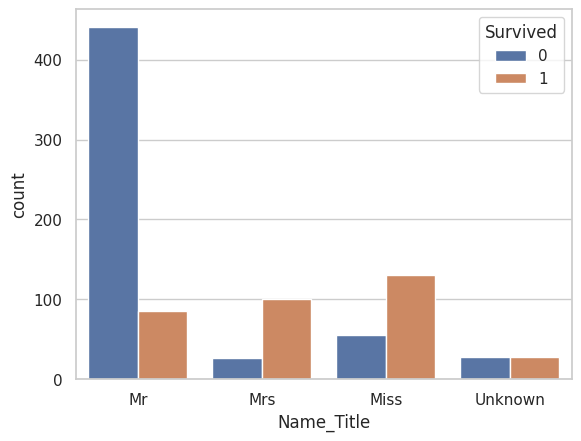

In [19]:
## Mapping for join similar information and creating a group for strange titles
def mapping_title(entry):
    if entry in ('Mrs', 'Mme'): return 'Mrs' ## Married woman
    elif entry in ('Mr', 'Dr', 'Don', 'Sir'): return 'Mr' ## Man
    elif entry in ('Miss', 'Ms', 'Mlle'): return 'Miss' # Single woman
    else: return 'Unknown' # For the rest options (there are very few)

df_train_dc['Name_Title'] = df_train_dc['Name_Title'].apply(mapping_title)
df_test_dc['Name_Title'] = df_test_dc['Name_Title'].apply(mapping_title)

sns.countplot(data=df_train_dc, x='Name_Title', hue='Survived')
plt.show()

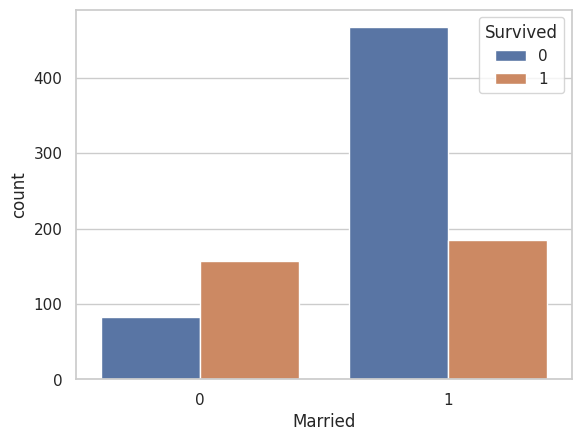

In [20]:
## Mapping for married or not situation
df_train_dc['Married'] = df_train_dc['Name_Title'].apply(lambda x: 1 if x in ['Mrs', 'Mme', 'Mr'] else 0)
df_test_dc['Married'] = df_test_dc['Name_Title'].apply(lambda x: 1 if x in ['Mrs', 'Mme', 'Mr'] else 0)

sns.countplot(data=df_train_dc, x='Married', hue='Survived')
plt.show()

In [21]:
df_train_dc.drop(['Name', 'Name_Family'], axis=1, inplace=True)
df_test_dc.drop(['Name', 'Name_Family'], axis=1, inplace=True)

In this distribution, the main conclusions are:

- A huge percentage of Man passengers dead compared with Woman
- The Unknown title is highly balanced
- Name_Family appears to be irrelevant and highly correlated with SibSp and Parch, dropped

## Feature engineering: Age

<Axes: xlabel='Age', ylabel='Count'>

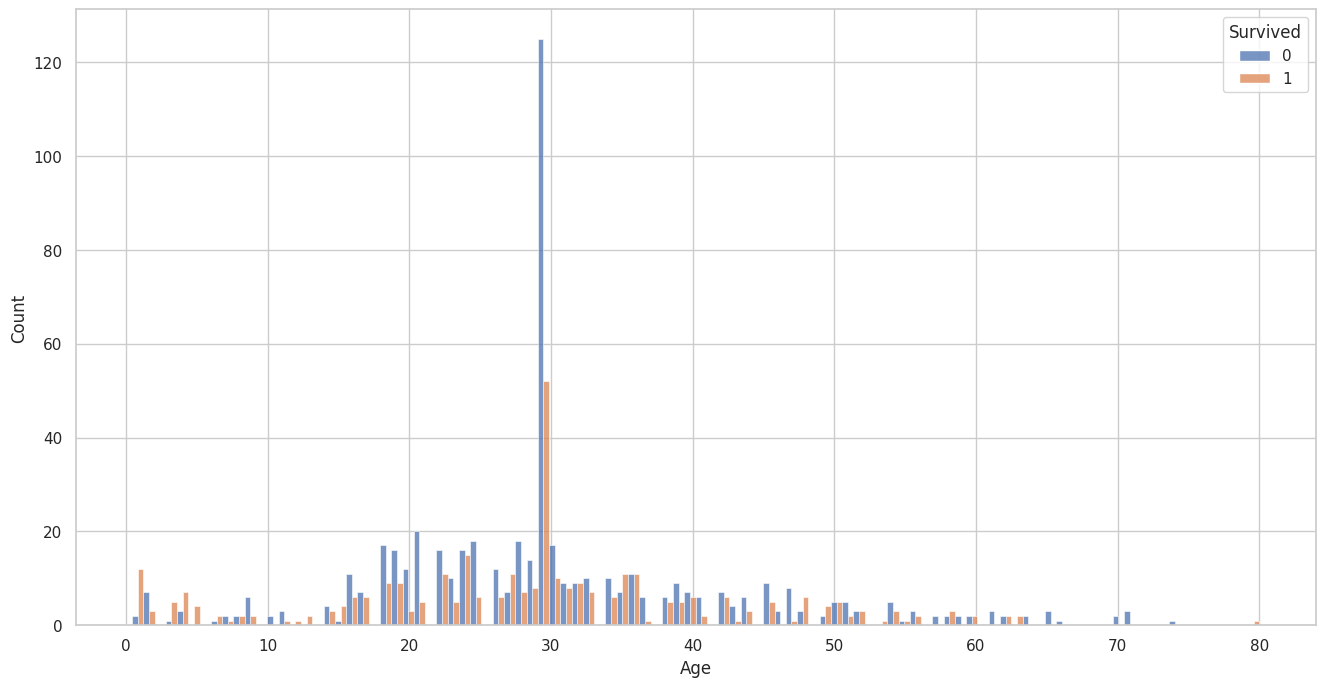

In [22]:
plt.figure(figsize=(16,8))
sns.histplot(data=df_train_dc, x='Age', bins=100, hue='Survived', multiple='dodge')

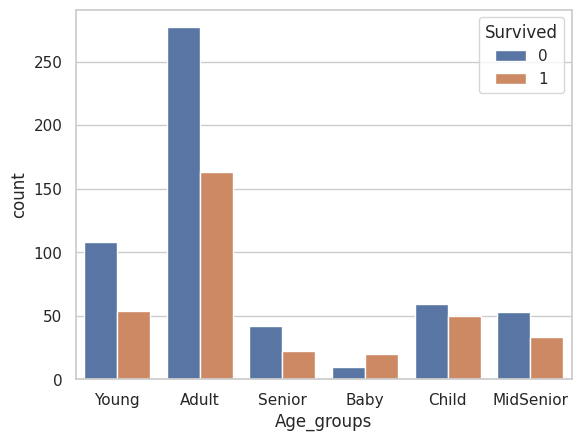

In [23]:
## Mapping for splitting data into age ranges
def age_groups(val):
    if val <= 3: return 'Baby'
    elif val <= 18: return 'Child'
    elif val <= 25: return 'Young'
    elif val <= 40: return 'Adult'
    elif val <= 50: return 'MidSenior'
    else: return 'Senior'

df_train_dc['Age_groups'] = df_train_dc['Age'].apply(age_groups)
df_test_dc['Age_groups'] = df_test_dc['Age'].apply(age_groups)

sns.countplot(data=df_train_dc, x='Age_groups', hue='Survived')
plt.show()

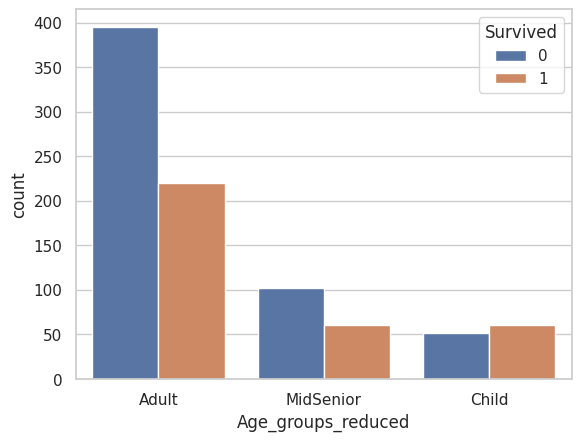

In [24]:
## Mapping for splitting data into reduced age ranges
def age_groups_reduced(val):
    if val < 18: return 'Child'
    elif val < 40: return 'Adult'
    else: return 'MidSenior'

df_train_dc['Age_groups_reduced'] = df_train_dc['Age'].apply(age_groups_reduced)
df_test_dc['Age_groups_reduced'] = df_test_dc['Age'].apply(age_groups_reduced)

sns.countplot(data=df_train_dc, x='Age_groups_reduced', hue='Survived')
plt.show()

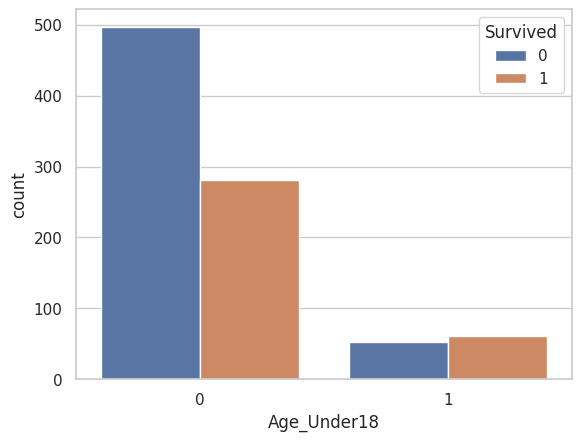

In [25]:
### Creating a new feature that indicates if each person is under 18
df_train_dc['Age_Under18'] = df_train_dc['Age'].apply(lambda x: 1 if x < 18 else 0)
df_test_dc['Age_Under18'] = df_test_dc['Age'].apply(lambda x: 1 if x < 18 else 0)

sns.countplot(data=df_train_dc, x='Age_Under18', hue='Survived')
plt.show()

In [26]:
df_train_dc.drop(['Age_groups_reduced', 'Age_groups'], axis=1, inplace=True)
df_test_dc.drop(['Age_groups_reduced', 'Age_groups'], axis=1, inplace=True)

In this distributions, the main conclusions are:

- People under 18 years appear to be the only age range that has more survivors than victims
- To be more specific, babies (under 3 years) is the only age range that has more survivors than victims
- Age ranges information could be reduced to be under 18 or not (ranges already removed). In both ranges it is clear that only ranges under 18 years are more likely to survive.

## Feature engineering: SibSp and Parch (Relatives)

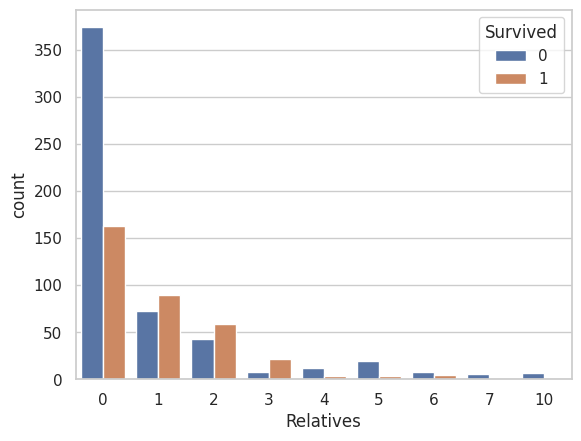

In [27]:
### Creating a new feature that indicates how many relatives of each person were in the Titanic
df_train_dc['Relatives'] = df_train_dc['SibSp'] + df_train_dc['Parch']
df_test_dc['Relatives'] = df_test_dc['SibSp'] + df_test_dc['Parch']

sns.countplot(data=df_train_dc, x='Relatives', hue='Survived')
plt.show()

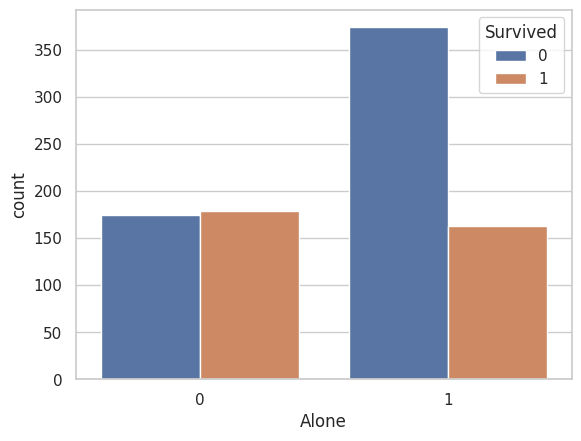

In [28]:
### Creating a new feature that indicates if each person is alone in the Titanic in terms of relatives
df_train_dc['Alone'] = df_train_dc['Relatives'].apply(lambda x: 1 if x < 1 else 0)
df_test_dc['Alone'] = df_test_dc['Relatives'].apply(lambda x: 1 if x < 1 else 0)

sns.countplot(data=df_train_dc, x='Alone', hue='Survived')
plt.show()

Better to use 'Relatives' option against FamilyName for creating the Alone feature. FamilyName could be worse option because it could be possible two different families with the same family name.

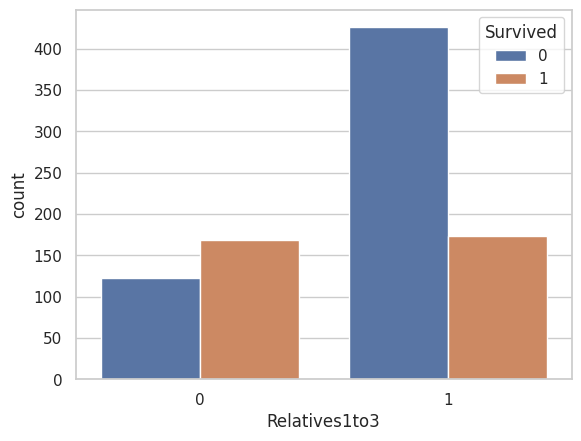

In [29]:
### Creating a new feature that indicates if each person has between 1 and 3 relatives in the Titanic
df_train_dc['Relatives1to3'] = df_train_dc['Relatives'].apply(lambda x: 1 if x < 1 or x > 3 else 0)
df_test_dc['Relatives1to3'] = df_test_dc['Relatives'].apply(lambda x: 1 if x < 1 or x > 3 else 0)

sns.countplot(data=df_train_dc, x='Relatives1to3', hue='Survived')
plt.show()

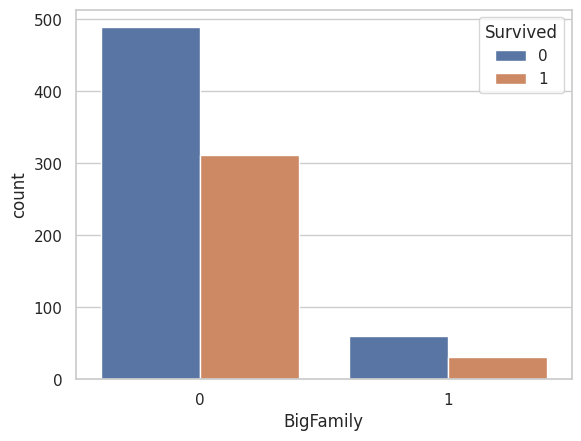

In [30]:
### Creating a new feature that indicates if each person had a lot of family on the boat (at least 3 relatives)
df_train_dc['BigFamily'] = df_train_dc['Relatives'].apply(lambda x: 1 if x >= 3 else 0)
df_test_dc['BigFamily'] = df_test_dc['Relatives'].apply(lambda x: 1 if x >= 3 else 0)

sns.countplot(data=df_train_dc, x='BigFamily', hue='Survived')
plt.show()

In [31]:
df_train_dc.drop(['BigFamily', 'SibSp', 'Parch'], axis=1, inplace=True)
df_test_dc.drop(['BigFamily', 'SibSp', 'Parch'], axis=1, inplace=True)

- Big family does not appear to offer enough information, both options have similar proportion
- Alone is quite similar to Relatives1to3 slightly better the second one (maintained for now)
- SibSp and Parch are discard because Relatives groups the information from both
- Relatives1to3 seems to offer more information that Relatives itself

## Feature engineering: Fare

<Axes: xlabel='Fare', ylabel='Count'>

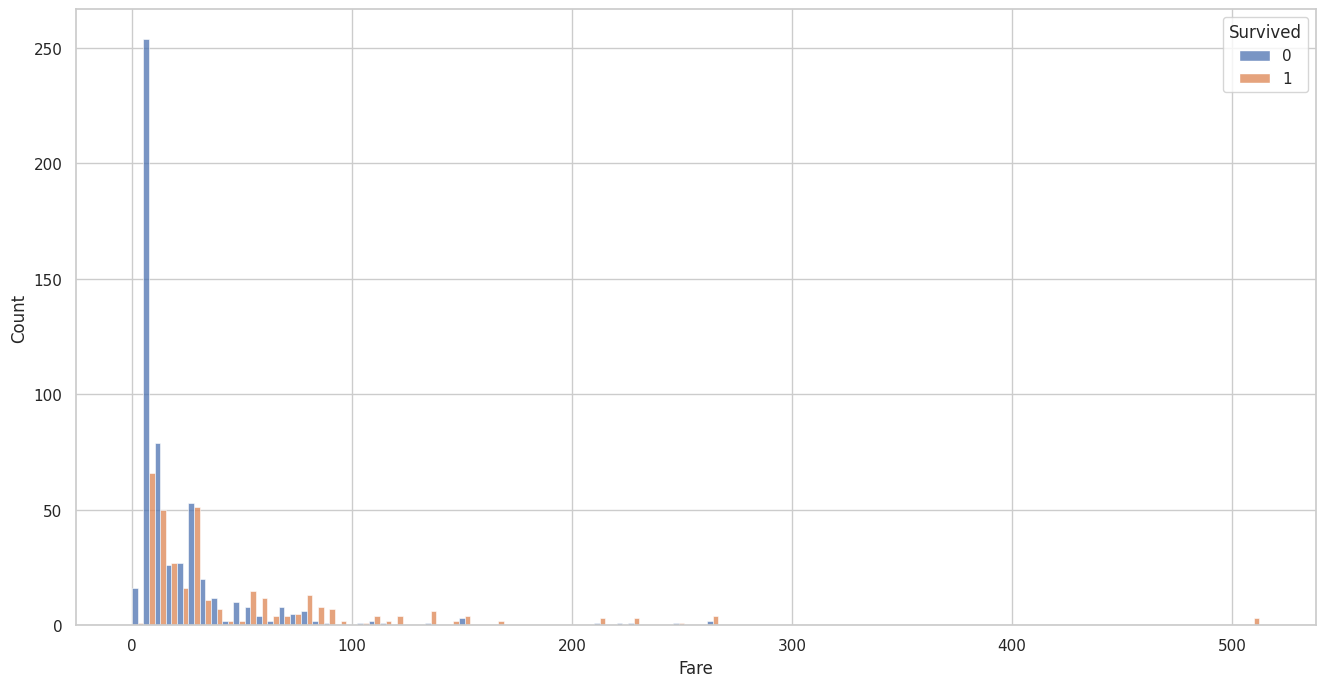

In [32]:
plt.figure(figsize=(16,8))
sns.histplot(data=df_train_dc, x='Fare', bins=100, hue='Survived', multiple='dodge')

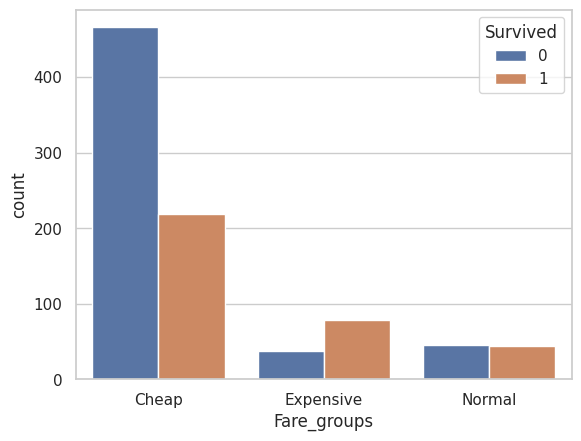

In [33]:
## Mapping for splitting data into reduced fare ranges
def fare_groups(val):
    if val <= 33: return 'Cheap'
    elif val <= 66: return 'Normal'
    else: return 'Expensive'

df_train_dc['Fare_groups'] = df_train_dc['Fare'].apply(fare_groups)
df_test_dc['Fare_groups'] = df_test_dc['Fare'].apply(fare_groups)

sns.countplot(data=df_train_dc, x='Fare_groups', hue='Survived')
plt.show()

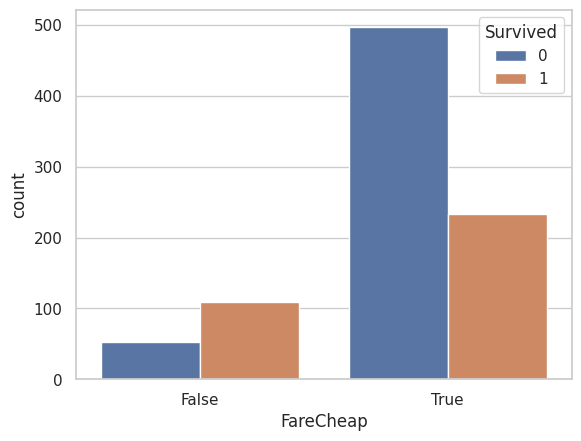

In [34]:
df_train_dc['FareCheap'] = df_train_dc['Fare'] < 50
df_test_dc['FareCheap'] = df_test_dc['Fare'] < 50

sns.countplot(data=df_train_dc, x='FareCheap', hue='Survived')
plt.show()

In [35]:
df_train_dc.drop(['Fare_groups'], axis=1, inplace=True)
df_test_dc.drop(['Fare_groups'], axis=1, inplace=True)

- The separationbetween fare ranges appear to be useful for the target variable
- FareGroups is finally removed because splitting into less or more than 50 appear to be more relevant

## Feature engineering: Cabin

In [36]:
df_train_dc['CabinLetter'] = df_train_dc['Cabin'].str.extract(r'([A-Za-z])')
df_test_dc['CabinLetter'] = df_test_dc['Cabin'].str.extract(r'([A-Za-z])')
df_train_dc['CabinLetter'].value_counts()

CabinLetter
N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64

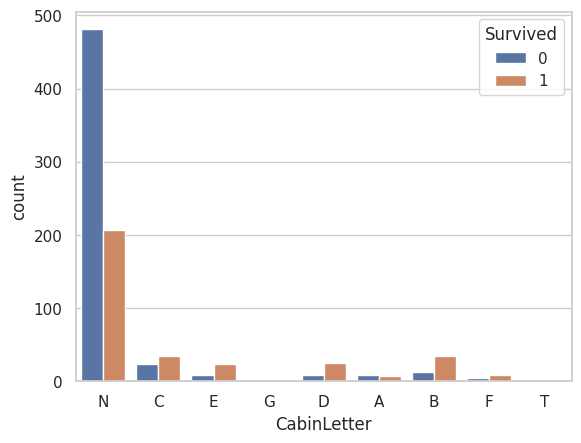

In [37]:
sns.countplot(data=df_train_dc, x='CabinLetter', hue='Survived')
plt.show()

When the Cabin is Unknown appear to be more probably to die in the Titanic disaster, based on that, let´s divide the information into Unknown or not.

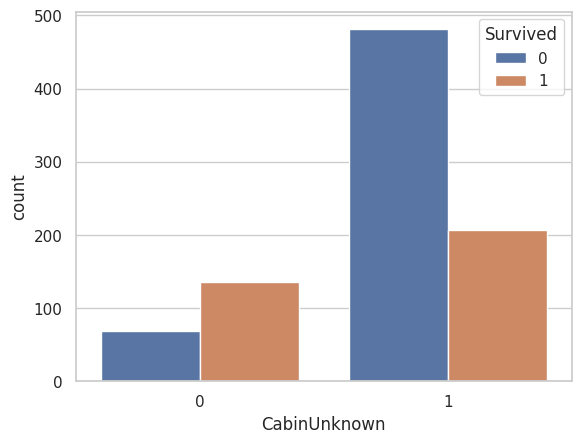

In [38]:
df_train_dc['CabinUnknown'] = df_train_dc['CabinLetter'].apply(lambda x: 0 if x!='N' else 1)
df_test_dc['CabinUnknown'] = df_test_dc['CabinLetter'].apply(lambda x: 0 if x!='N' else 1)

sns.countplot(data=df_train_dc, x='CabinUnknown', hue='Survived')
plt.show()

In [39]:
df_train_dc.drop(['Cabin', 'CabinLetter'], axis=1, inplace=True)
df_test_dc.drop(['Cabin', 'CabinLetter'], axis=1, inplace=True)

- CabinLetter is dropped because CabinUnknown can group better the information
- Cabin does not appear to be relevant apart from getting the previous information

## Feature engineering: Ticket

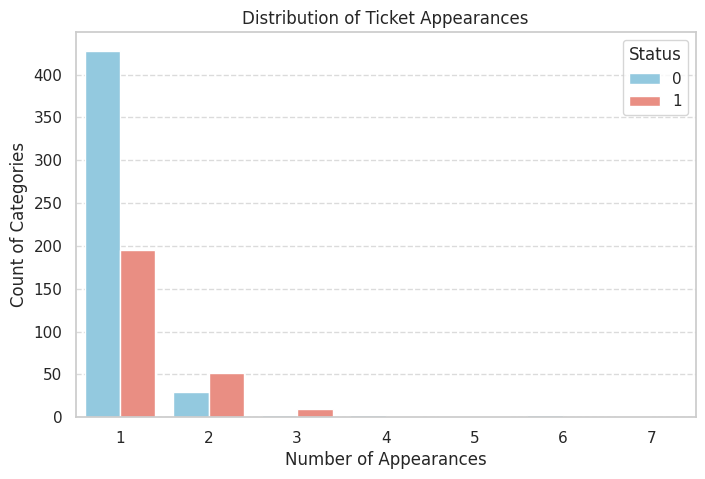

In [40]:
category_counts = df_train_dc.groupby(['Ticket', 'Survived']).size().reset_index(name='Appearances')
appearance_counts = category_counts.groupby(['Appearances', 'Survived']).size().reset_index(name='Count')

plt.figure(figsize=(8, 5))
sns.barplot(x='Appearances', y='Count', hue='Survived', data=appearance_counts, palette=['skyblue', 'salmon'])

plt.legend(title="Status", loc="upper right")
plt.xlabel("Number of Appearances")
plt.ylabel("Count of Categories")
plt.title("Distribution of Ticket Appearances")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

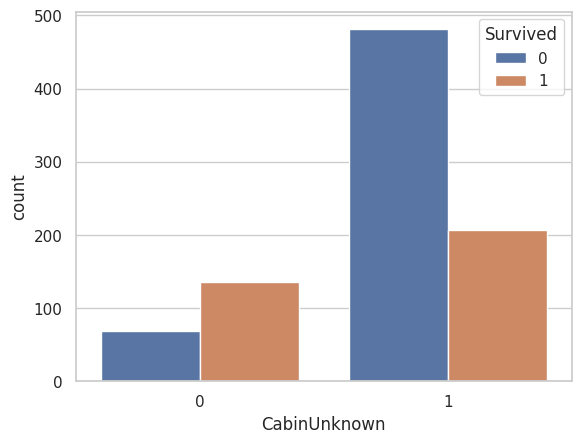

In [41]:
ticket_counts = df_train_dc.groupby('Ticket')['Ticket'].transform('count')
df_train_dc['TicketRepeated'] = ticket_counts > 1

ticket_counts = df_test_dc.groupby('Ticket')['Ticket'].transform('count')
df_test_dc['TicketRepeated'] = ticket_counts > 1

sns.countplot(data=df_train_dc, x='CabinUnknown', hue='Survived')
plt.show()

In [42]:
df_train_dc.drop(['Ticket'], axis=1, inplace=True)
df_test_dc.drop(['Ticket'], axis=1, inplace=True)

- Non duplicated ticket appear to be correlated with a less probability of survive
- Dropping Ticket because does not appear to offer more information

## Feature engineering: Remaining ones

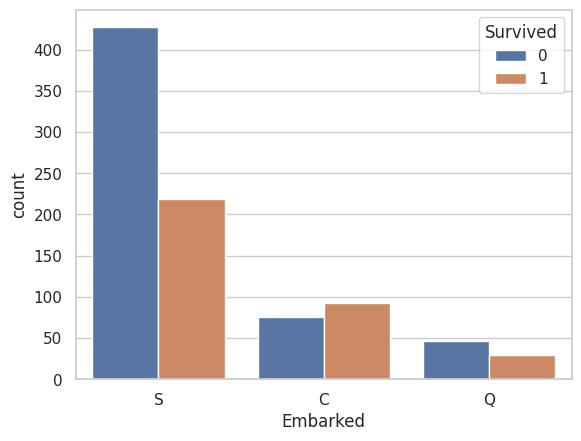

In [43]:
sns.countplot(data=df_train_dc, x='Embarked', hue='Survived')
plt.show()

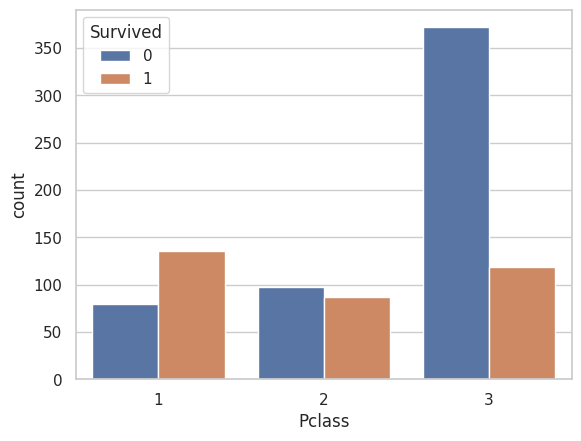

In [44]:
sns.countplot(data=df_train_dc, x='Pclass', hue='Survived')
plt.show()

In [45]:
df_train_dc['Sex'] = df_train_dc['Sex'].map({'male': 0, 'female': 1})
df_test_dc['Sex'] = df_test_dc['Sex'].map({'male': 0, 'female': 1})

df_train_dc['TicketRepeated'] = df_train_dc['TicketRepeated'].map({False: 0, True: 1})
df_test_dc['TicketRepeated'] = df_test_dc['TicketRepeated'].map({False: 0, True: 1})

df_train_dc['FareCheap'] = df_train_dc['FareCheap'].map({False: 0, True: 1})
df_test_dc['FareCheap'] = df_test_dc['FareCheap'].map({False: 0, True: 1})

The remaining features do not seem to be able to provide more information.

- Survived and Sex are already a binary data
- Pclass is already encoded and distributed in three options (only C has different behaviour)
- Embarked only indicates in which port each passenger embarked

In [46]:
df_train_dc.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Name_Title,Married,Age_Under18,Relatives,Alone,Relatives1to3,FareCheap,CabinUnknown,TicketRepeated
0,0,3,0,22.000000,7.2500,S,Mr,1,0,1,0,0,1,1,0
1,1,1,1,38.000000,71.2833,C,Mrs,1,0,1,0,0,0,0,0
2,1,3,1,26.000000,7.9250,S,Miss,0,0,0,1,1,1,1,0
3,1,1,1,35.000000,53.1000,S,Mrs,1,0,1,0,0,0,0,1
4,0,3,0,35.000000,8.0500,S,Mr,1,0,0,1,1,1,1,0
5,0,3,0,29.699118,8.4583,Q,Mr,1,0,0,1,1,1,1,0
6,0,1,0,54.000000,51.8625,S,Mr,1,0,0,1,1,0,0,0
7,0,3,0,2.000000,21.0750,S,Unknown,0,1,4,0,1,1,1,1
8,1,3,1,27.000000,11.1333,S,Mrs,1,0,2,0,0,1,1,1
9,1,2,1,14.000000,30.0708,C,Mrs,1,1,1,0,0,1,1,1


In [47]:
df_train_dc.dtypes

Survived            int64
Pclass              int64
Sex                 int64
Age               float64
Fare              float64
Embarked           object
Name_Title         object
Married             int64
Age_Under18         int64
Relatives           int64
Alone               int64
Relatives1to3       int64
FareCheap           int64
CabinUnknown        int64
TicketRepeated      int64
dtype: object

## Distribution and correlation of columns

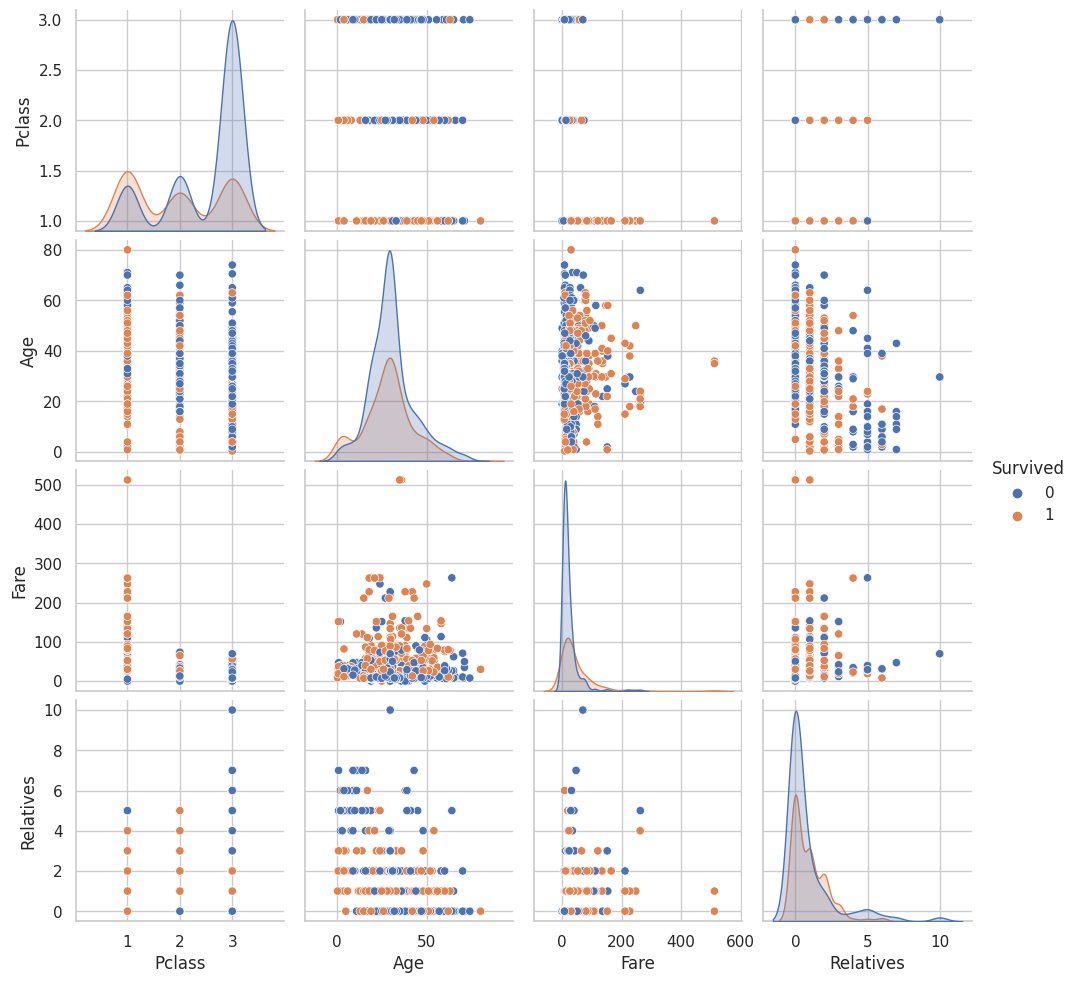

In [48]:
columns = ['Pclass', 'Age', 'Fare', 'Relatives', 'Survived']
sns.pairplot(df_train_dc[columns], hue='Survived', height=2.5)
plt.show()

Main observations:

- Passenger located in Pclass 1 and/or female passengers appear to have more probability to survive.
- The majority of people age is near 30 years, having a distribution similar to gaussian distribution.
- Babies or people under 18 years are the only age range in which there are more survivors than deaths.

Name_Title_Mr        -0.548593
Married              -0.339954
Pclass               -0.338481
CabinUnknown         -0.316912
FareCheap            -0.283116
Relatives1to3        -0.279855
Alone                -0.203367
Embarked_S           -0.149683
Age                  -0.067809
Embarked_Q            0.003650
Relatives             0.016639
Name_Title_Unknown    0.060670
Age_Under18           0.122239
Embarked_C            0.168240
TicketRepeated        0.222602
Fare                  0.257482
Name_Title_Miss       0.335636
Name_Title_Mrs        0.341994
Sex                   0.543351
Survived              1.000000
Name: Survived, dtype: float64


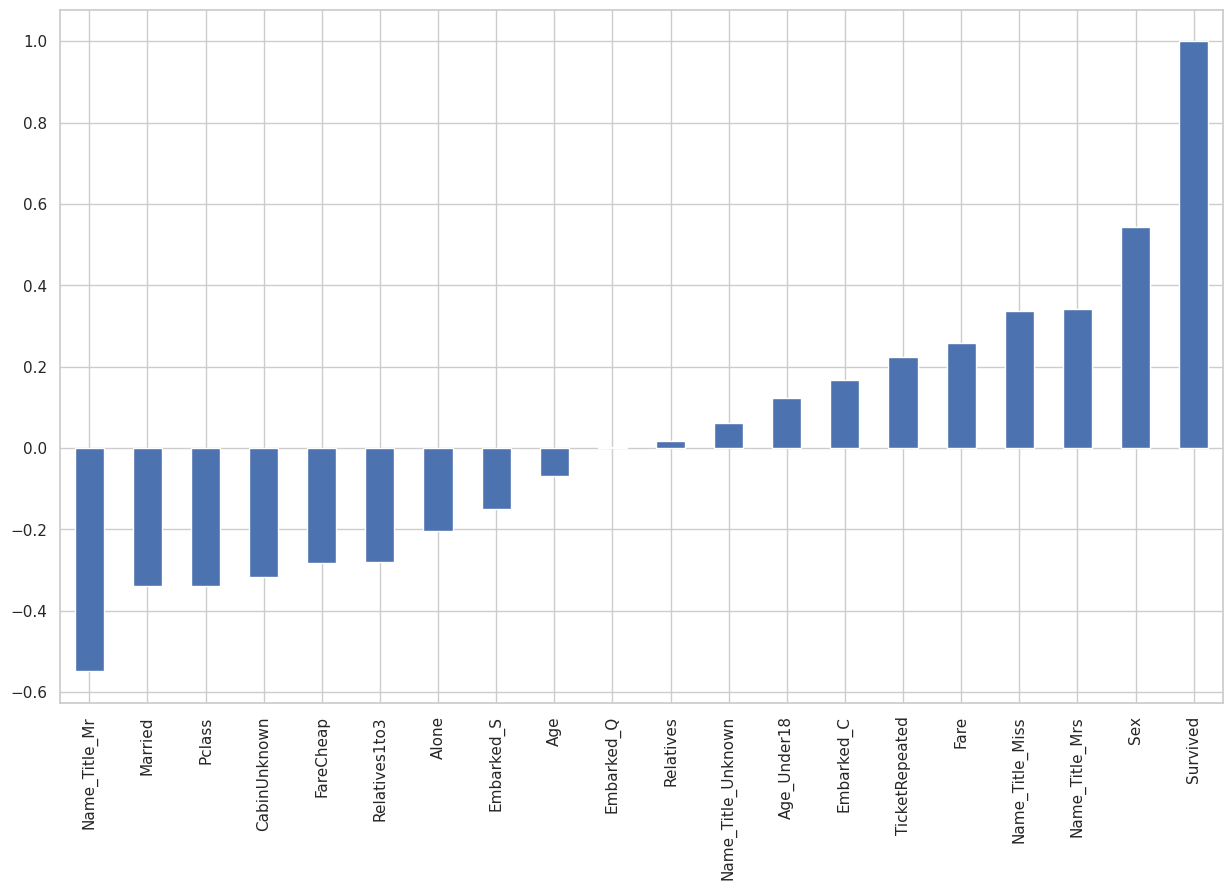

In [49]:
df_aux = pd.get_dummies(df_train_dc).astype(int) 
df_aux_test = pd.get_dummies(df_test_dc).astype(int) 
aux_numerical_cols, aux_categorical_cols = split_numerical_categorical_cols(df_aux)

fig = plt.figure(figsize=(15,9))
df_aux.corr()['Survived'].sort_values(ascending=True).plot(kind='bar')
print(df_aux.corr()['Survived'].sort_values(ascending=True))
plt.show()

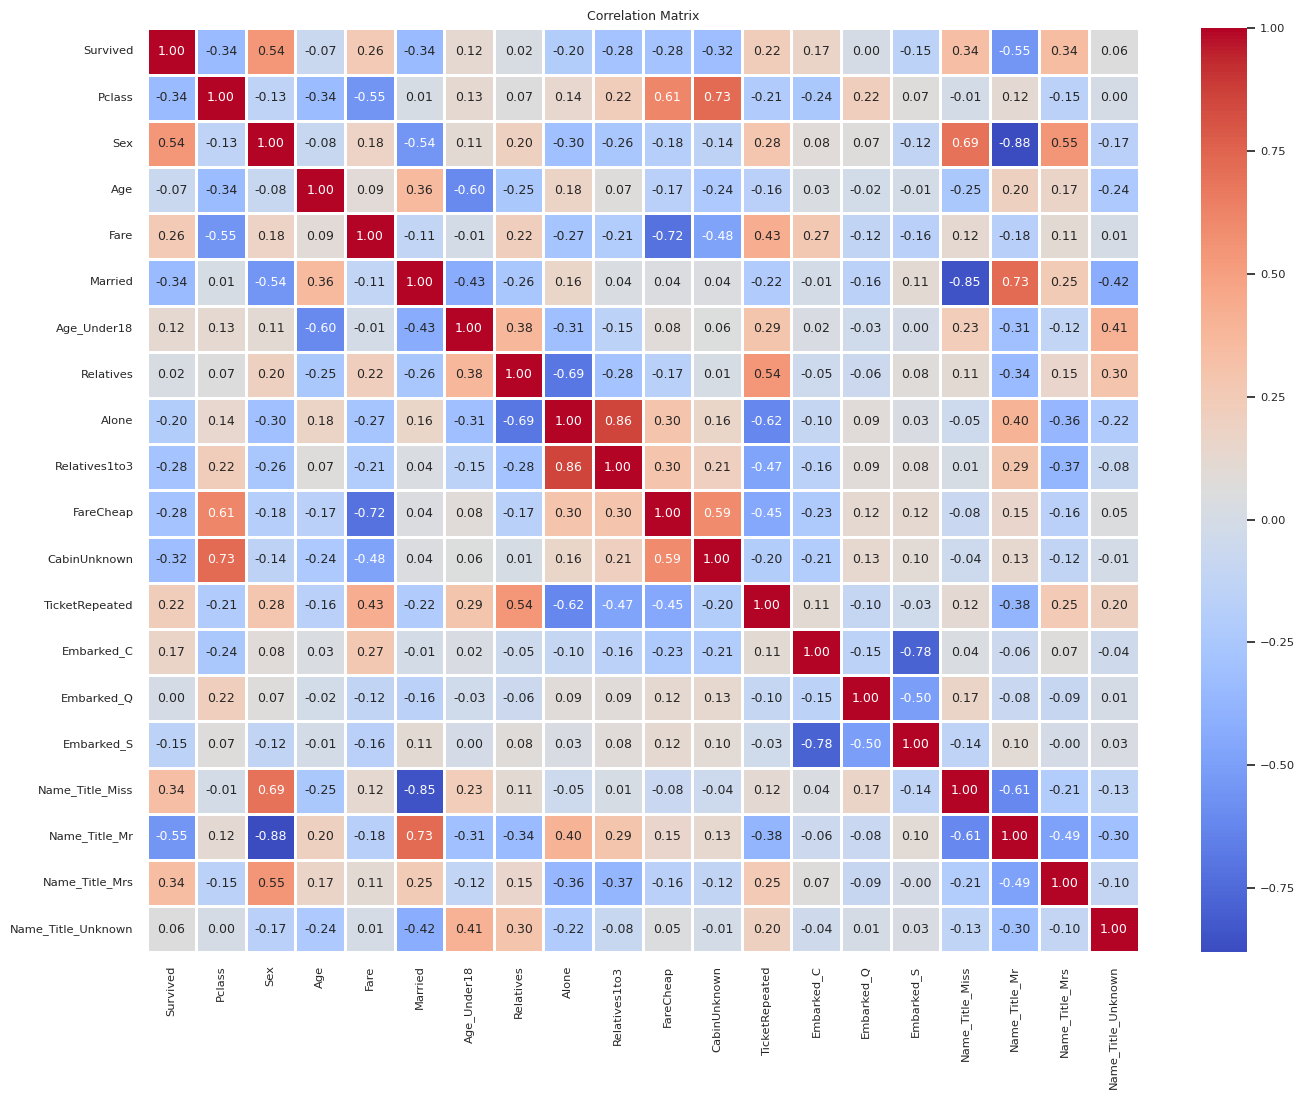

In [50]:
plt.figure(figsize=(16,12))
cm = np.corrcoef(df_aux.values.T)
sns.set(font_scale=0.75)
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1, yticklabels=aux_numerical_cols, xticklabels=aux_numerical_cols)
plt.title('Correlation Matrix')
plt.show()

Most correlated with the target variable are (in order):
- Titles and Sex
- Pclass
- Cabin_Unknown
- Fare_Cheap
- Relatives1to3
- Fare
- Ticket_Repeated

Less correlated features with the target variable (dropped):
- Embarked_Q
- Name_Title_Unknown
- Relatives
- Age

Other correlations:
- Relatives1to3 is extremely correlated with Alone
- Married and Name_Title_Miss // Sex and Name_Title_Mr are also extremely correlated
- CabinUnknown is huge correlated with PClass and FareCheap
- Relatives is highly correlated with TicketRepeated

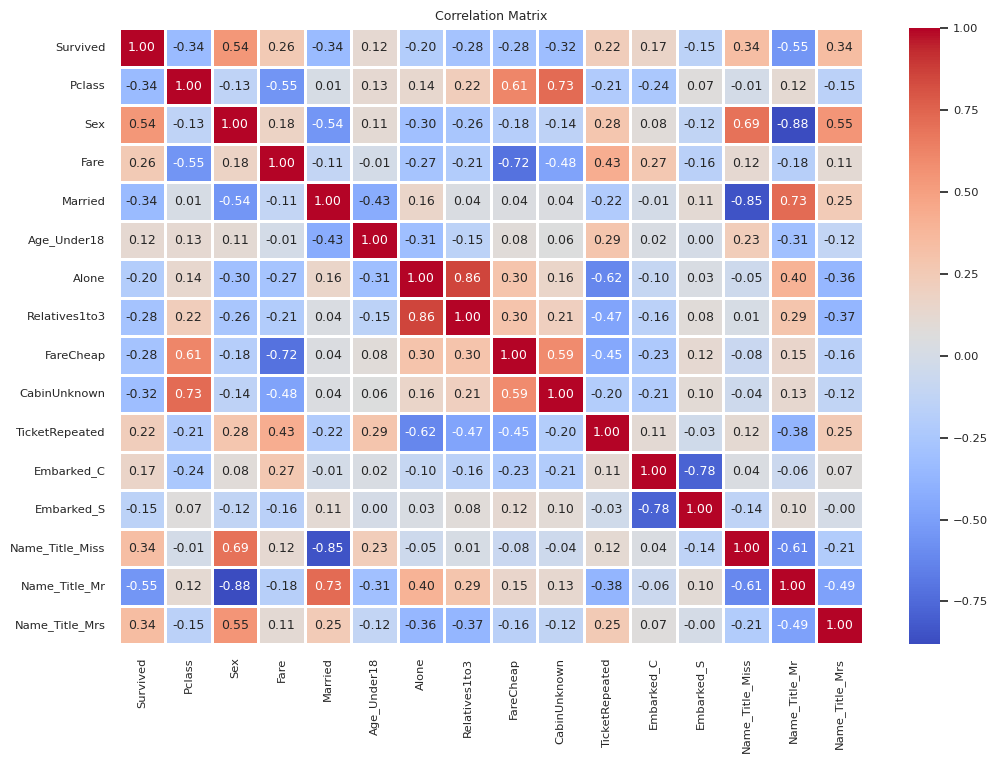

In [51]:
df_aux.drop(['Age', 'Relatives', 'Embarked_Q', 'Name_Title_Unknown'], axis=1, inplace=True)
df_aux_test.drop(['Age', 'Relatives', 'Embarked_Q', 'Name_Title_Unknown'], axis=1, inplace=True)
aux_numerical_cols, aux_categorical_cols = split_numerical_categorical_cols(df_aux)

plt.figure(figsize=(12,8))
cm = np.corrcoef(df_aux.values.T)
sns.set(font_scale=0.75)
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1, yticklabels=aux_numerical_cols, xticklabels=aux_numerical_cols)
plt.title('Correlation Matrix')
plt.show()

# Random Forest

In [52]:
y = df_aux['Survived']
X = df_aux.drop('Survived', axis=1)
X_test = df_aux_test

In [53]:
'''rf = RandomForestClassifier(max_features='auto', oob_score=True, random_state=42, n_jobs=-1)

param_grid = { 
    "max_depth" : [5, 10, 15, 20, 25, 30],
    "criterion" : ["gini", "entropy"], 
    "max_features": [2, 4, 6, 8, 10],
    "min_samples_leaf" : [2, 4, 6, 8, 10], 
    "min_samples_split" : [2, 4, 6, 8, 10], 
    "n_estimators": [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)
gs = gs.fit(X, y)

print('Best hyperparameters are: \n'+str(gs.best_params_))
print('Best score is: '+str(gs.best_score_))'''

'rf = RandomForestClassifier(max_features=\'auto\', oob_score=True, random_state=42, n_jobs=-1)\n\nparam_grid = { \n    "max_depth" : [5, 10, 15, 20, 25, 30],\n    "criterion" : ["gini", "entropy"], \n    "max_features": [2, 4, 6, 8, 10],\n    "min_samples_leaf" : [2, 4, 6, 8, 10], \n    "min_samples_split" : [2, 4, 6, 8, 10], \n    "n_estimators": [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]\n}\n\ngs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring=\'accuracy\', cv=3, n_jobs=-1)\ngs = gs.fit(X, y)\n\nprint(\'Best hyperparameters are: \n\'+str(gs.best_params_))\nprint(\'Best score is: \'+str(gs.best_score_))'

Output from GridSearchCV:

- Best hyperparameters are: 
- {'criterion': 'gini', 'max_depth': 5, 'max_features': 4, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
- Best score is: 0.8294051627384961

In [54]:
model = RandomForestClassifier(
    criterion='gini', 
    max_features=4, 
    n_estimators=50, 
    max_depth=5, 
    min_samples_leaf=2, 
    min_samples_split=10, 
    random_state=42
)

model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': df_test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)